In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import *

In [2]:
sonar = pd.read_csv(r"/home/sarthakredasani/Documents/CDAC_ML/Cases/Cases/Sonar/Sonar.csv")
sonar.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
X, y = sonar.drop('Class', axis=1), sonar['Class']
le = LabelEncoder()
le_y = le.fit_transform(y)

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X, le_y, test_size=0.3, random_state=25,
                                                  stratify=le_y)

In [5]:
lr = LogisticRegression(solver='lbfgs', penalty='l2')
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)

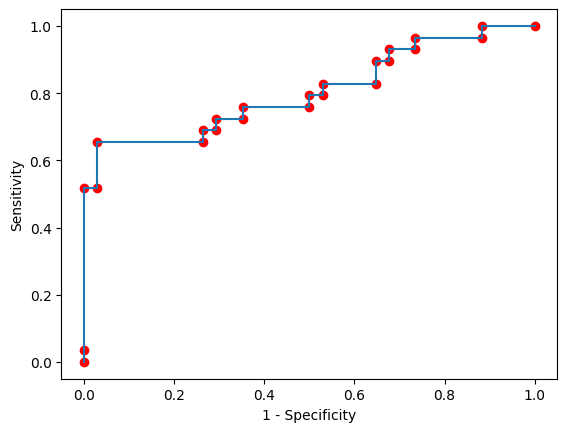

In [6]:
one_m_spec, sens, thres = roc_curve(y_test, y_pred_prob[:,1])
plt.scatter(one_m_spec, sens, c="red")
plt.plot(one_m_spec, sens)
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.show()

In [7]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.8052738336713996

In [8]:
penalties = ['l1', 'l2', 'elasticnet', None]
ratios = np.linspace(0.001, 0.98, 20)
scores = []
for p in penalties:
    for r in ratios:
        lr = LogisticRegression(solver='saga', penalty=p, l1_ratio=r)
        lr.fit(X_train, y_train)
        y_pred_prob = lr.predict_proba(X_test)
        scores.append([p,r,(roc_auc_score(y_test, y_pred_prob[:,1]))])
df_scores = pd.DataFrame(scores, columns=['penality','l1_ratio', 'score'])
df_scores.sort_values('score', ascending=False).head(1)

/home/sarthakredasani/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/sarthakredasani/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarthakredasani/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/sarthakredasani/.local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sarthakredasani/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings

,penality,l1_ratio,score
79,None,0.98,0.811359
